# Problema de clasificación  **Census**



In [1]:
# cargamos librerías necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

## Carga de Datos y preparación

Cargo los datos y reviso los valores

In [2]:
census_data = pd.read_csv("./census.csv")
census_data.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
#Eliminamos los blancos de las cadenas
def trimAllColumns(df):
    trimStrings = lambda x: x.strip() if type(x) is str else x
    return df.applymap(trimStrings)

census_data = trimAllColumns(census_data)

In [4]:
#Comprobamos los valores de las variables de texto
print('workclass - ' , census_data['workclass'].unique())
print('education_level - ' , census_data['education_level'].unique())
print('marital-status - ' , census_data['marital-status'].unique())
print('occupation - ' , census_data['occupation'].unique())
print('relationship - ' , census_data['relationship'].unique())
print('race - ' , census_data['race'].unique())
print('sex - ' , census_data['sex'].unique())
print('native-country - ' , census_data['native-country'].unique())
print('income - ' , census_data['income'].unique())

workclass -  ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
education_level -  ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
marital-status -  ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation -  ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
relationship -  ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race -  ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex -  ['Male' 'Female']
native-country -  ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germ

In [5]:
#Comprbamos si hay NA
census_data.isna().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Analisis exploratorio

Se realiza el siguiente análisis exploratorio:
* Analisis estadístico con describe
* Histográma de las variables numéricas para hacernos una idea de la distribución
* Distribución de los valores en las variables categóricas
* Boxplot de las variables numéricas para detectar los outliers y ver la distribución


In [6]:
#Analisis de las variables numéricas
census_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


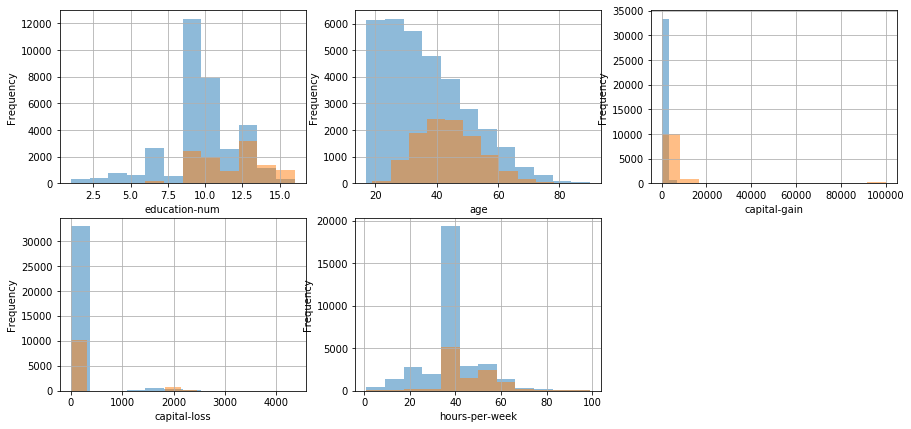

In [7]:
#Histogramas para ver la distribución de las variables numéricas

plt.figure(figsize=(15, 7))

cols = ['education-num','age','capital-gain','capital-loss','hours-per-week']
for idx, col in enumerate(cols):
    plt.subplot(2,3,idx+1)
    census_data[census_data['income']=='<=50K'][col].plot.hist(alpha=0.5, bins=12, grid = True, label='<=50K')
    census_data[census_data['income']=='>50K'][col].plot.hist(alpha=0.5, bins=12, grid = True, label='>50K')
    plt.xlabel(col)

plt.show()

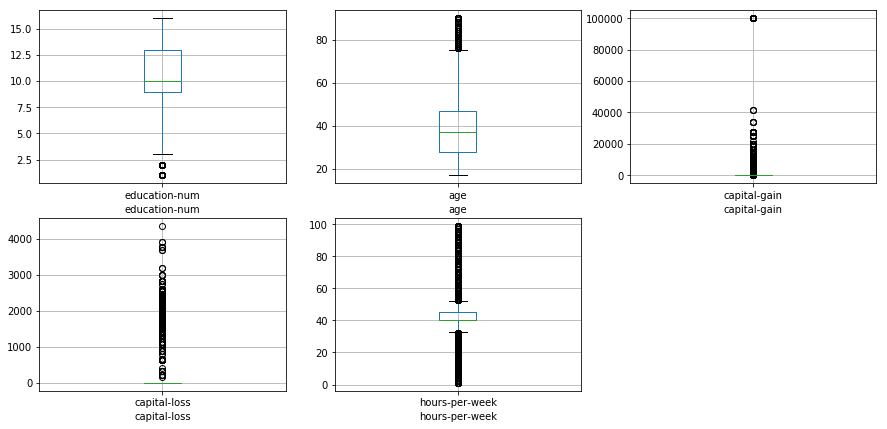

In [8]:
plt.figure(figsize=(15, 7))

cols = ['education-num','age','capital-gain','capital-loss','hours-per-week']
for idx, col in enumerate(cols):
    plt.subplot(2,3,idx+1)
    census_data.boxplot(column=col)
    plt.xlabel(col)

plt.show()

with capital-loss : 2140
without capital-loss : 43082


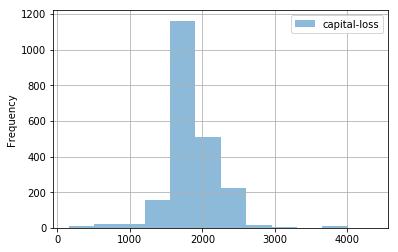

with capital-gain : 3790
without capital-gain : 41432


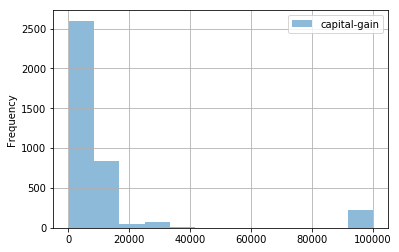

In [9]:
# Para intentar entender mejor las variables 'capital-loss' y 'capital-gain'
def analisis_Capital(col):
    df_capital_loss = census_data[[col]]
    with_capital_loss = df_capital_loss[df_capital_loss[col] > 0]
    without_capital_loss = df_capital_loss[df_capital_loss[col] == 0]
    print('with',col,':',len(with_capital_loss))
    print('without',col,':',len(without_capital_loss))
    with_capital_loss.plot.hist(alpha=0.5, bins=12, grid = True)
    plt.show()

analisis_Capital('capital-loss')
analisis_Capital('capital-gain')

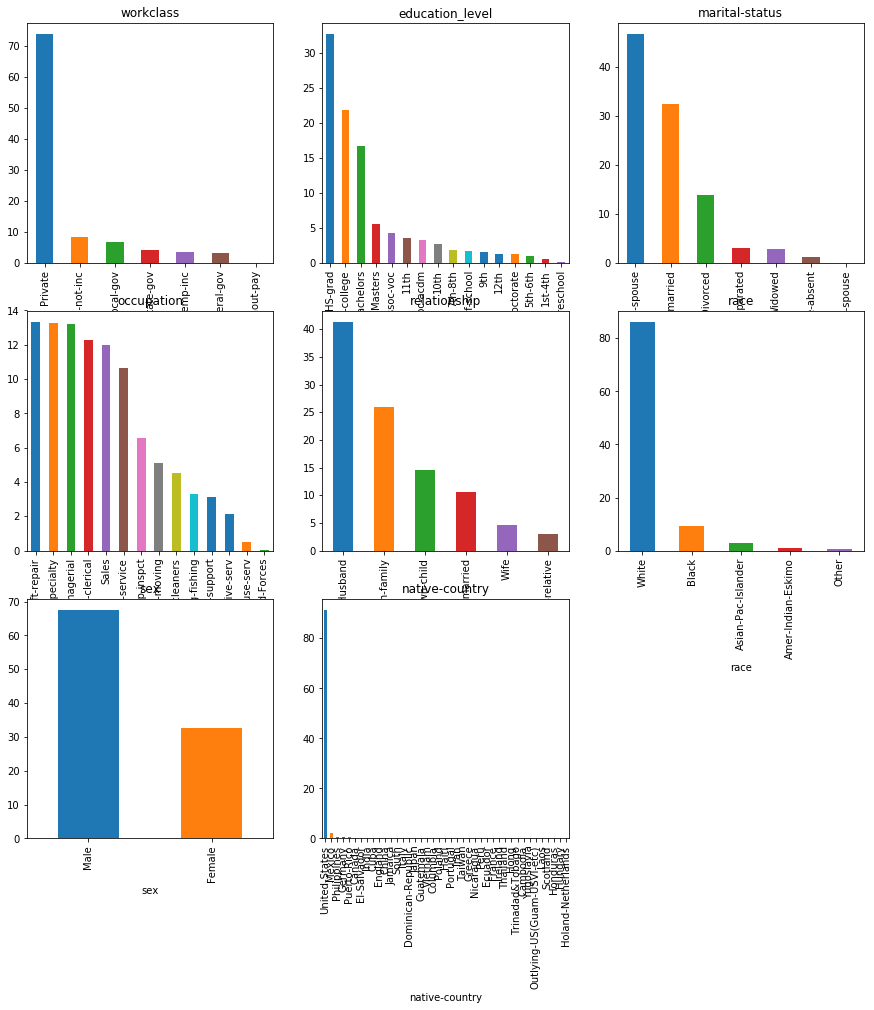

In [10]:
def subplot(column):
    (100* census_data[column].value_counts() / len(census_data[column])).plot(kind='bar', title=column)

plt.figure(figsize=(15, 15))

cols = ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']
for idx, col in enumerate(cols):
    plt.subplot(3,3,idx+1)
    subplot(col)
    plt.xlabel(col)

plt.show()

## Primeras conclusiones

De este primer análisis saco las siguientes conclusiones:
* De la variabes 'native-country', obtengo que la gran mayoría de las muestras son de estados unidos. Me parece interesante sustituir esta columna por una que indique si es de estados unidos o es extranjero.
* Con las variables 'work-class' y 'race' ocurre un poco o mismo, los datos estan muy sesgados ya que la mayoría pertenecen a la misma clase, pero en este caso no los elimino ya que no hay tantos casos
* Dada la distribución de capital-loss y capital-gain, me parece interesante unirlas en una unica columna codificarlas como variable binarias, de tal forma que tengamos 0 si no tienen ganancias ni perdidas de capitales y 1 en caso contrario. 
* Como observamos en los boxplot tenemos que tratar los outlier de las columnas 'hours-per-week' y 'age' para que no distorsionen el entrenamiento del algoritmo. El tratamiento que voy a realizar de los outliers es sustituirlo por los valores maximos Q3+RIC*1.5  o  Q1-RIC*1.5

In [11]:
# Tratamiento de las variables native-country, capital-gain y capital-loss

def from_usa(row):
    if row['native-country'] == 'United-States' :
        return 1
    else:
        return 0

def capital(row):
    if row['capital-gain'] > 0 or row['capital-loss'] > 0 :
        return 1
    else:
        return 0

census_data_v1 = census_data
census_data_v1['from-USA'] = census_data_v1.apply(from_usa, axis=1)
census_data_v1 = census_data_v1.drop(columns='native-country')
census_data_v1['capital'] = census_data_v1.apply(capital, axis=1)
census_data_v1 = census_data_v1.drop(columns=['capital-gain','capital-loss'])

census_data_v1.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income,from-USA,capital
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,<=50K,1,1
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,<=50K,1,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,<=50K,1,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,<=50K,1,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,<=50K,0,0


In [12]:
census_data_v2 = census_data_v1
#Tratamiento de los outlier

def outliers(c, ma, mi, row):
    if row[c] > ma:
        return ma
    if row[c] < mi:
        return mi
    return row[c]

def quantile_calc(cendata, col):
    quantile = cendata.quantile([0.25,0.5,0.75])
    Q1 = quantile.iloc[0][col]
    Q3 = quantile.iloc[2][col]
    RIC = Q3 - Q1
    MAX = Q3 + RIC*1.5
    MIN = Q1 - RIC*1.5
    return (MAX,MIN)



col='age'
(max_age,min_age) = quantile_calc(census_data_v2,col)
census_data_v2[col] = census_data_v2.apply(lambda row: outliers(col,max_age,min_age,row), axis=1)

col='hours-per-week'
(max_age,min_age) = quantile_calc(census_data_v2,col)
census_data_v2[col] = census_data_v2.apply(lambda row: outliers(col,max_age,min_age,row), axis=1)

census_data_v2.describe()

,age,education-num,hours-per-week,from-USA,capital
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.514672,10.118460,41.417485,0.913095,0.131131
std,13.112025,2.552881,6.145037,0.281698,0.337547
min,17.000000,1.000000,32.500000,0.000000,0.000000
25%,28.000000,9.000000,40.000000,1.000000,0.000000
50%,37.000000,10.000000,40.000000,1.000000,0.000000
75%,47.000000,13.000000,45.000000,1.000000,0.000000
max,75.500000,16.000000,52.500000,1.000000,1.000000


## Codificación de variables categórias

Codificamos las variables categóricas usandoone hot encoding.

En este caso, las variables 'sex' e 'income' las codificamos con 0 y 1 ya que solo tiene 2 valores posibles

En el caso de 'education_level', es un campo categórico con orden, por lo que le damos valores numéricos siguiendo ese orden

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Codifica con one hot encoder una columna
def encode(dataframe, column):
    label_encoder = LabelEncoder()
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = label_encoder.fit_transform(dataframe[column])
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit(integer_encoded)
    clases = label_encoder.transform(label_encoder.classes_)
    clases = np.reshape(clases, (len(clases), 1))
    onehot_classes = onehot_encoder.transform(integer_encoded)
    df = pd.DataFrame(data=onehot_classes, dtype=np.int8)
    df.columns = label_encoder.classes_
    dataframe_drop = dataframe.drop(columns=[column])
    result = pd.concat([df, dataframe_drop],axis=1)
    return result

#Codifica con one hot encoder n columnas
def encodeColumns(dataframe, columns):
    dfr = dataframe
    for col in columns:
        dfr = encode(dfr, col)
    return dfr

#Codifica con un label encoder una columna
def labelEncoded(dataframe, column):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(dataframe[column])
    print(list(label_encoder.classes_))
    print(label_encoder.transform(label_encoder.classes_))
    colname = column + '_encoded'
    dfr = pd.DataFrame(data={colname: integer_encoded})
    dataframe_drop = dataframe.drop(columns=[column])
    r = pd.concat([dfr, dataframe_drop],axis=1)
    return r

#Codifica con label encoder N Columnas
def labelEncodeColumns(dataframe, columns):
    dfr = dataframe
    for col in columns:
        dfr = labelEncoded(dfr, col)
    return dfr

#Transformamos las columnas categóricas y las codificamos cpn one hot encoding
res = encodeColumns(census_data_v2, ['workclass','marital-status','occupation','relationship','race'])
#Transforamos las columnas categóricas que solo tiene 2 valores con un laber encoder
res = labelEncodeColumns(res,['sex','income'])
#Codificamos el campo education_level para darle un orden
map_to_encode = {
    'Preschool': 1, 
    '1st-4th': 2,
    '5th-6th': 3, 
    '7th-8th': 4, 
    '9th': 5,
    '10th': 6, 
    '11th': 7, 
    '12th': 8, 
    'HS-grad': 9,
    'Prof-school': 10,
    'Assoc-acdm': 11,
    'Assoc-voc': 12,
    'Some-college': 13,
    'Bachelors': 14,      
    'Masters': 15, 
    'Doctorate': 16
}
res['education_level'] = res['education_level'].apply(lambda x: map_to_encode[x])

census_data_proc = res
census_data_proc.head(5)
#Ya tenemos todos los campos categóricos transformados en numéricos

['Female', 'Male']
[0 1]
['<=50K', '>50K']
[0 1]


,income_encoded,sex_encoded,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Husband,Not-in-family,Other-relative,...,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,age,education_level,education-num,hours-per-week,from-USA,capital
0,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,39.0,14,13.0,40.0,1,1
1,0,1,0,0,0,0,1,1,0,0,...,0,1,0,0,50.0,14,13.0,32.5,1,0
2,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,38.0,9,9.0,40.0,1,0
3,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,53.0,7,7.0,40.0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,28.0,14,13.0,40.0,0,0


## Analisis exploratorio

Se realiza el siguiente análisis exploratorio:
* Grafico de correlación para detectar la variables mas correlacionadas
* Scatter plot para las variables que ams correlación tienen.

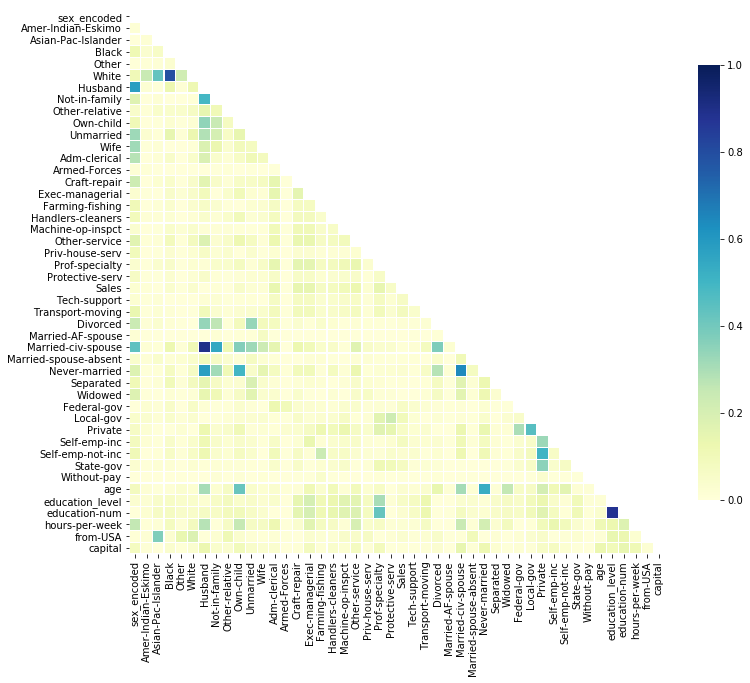

In [14]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(census_data_proc.drop(['income_encoded'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [15]:
# Sacamos las variables mas correlacionadas de la matriz de correlacion
limit = 0.5
df = census_data_proc.corr()
corr_vars = []
cols = df.columns
for x in cols:
    for y in cols:
        if(df[x][y]>limit and x != y and not (y,x) in corr_vars and not (x,y) in corr_vars):
            print(x + " <--> " + y + " : Corr=" + str(df[x][y]))
            corr_vars.append((x,y))


sex_encoded <--> Husband : Corr=0.581587986083404
Husband <--> Married-civ-spouse : Corr=0.8972198554405721
education_level <--> education-num : Corr=0.8773164077580177


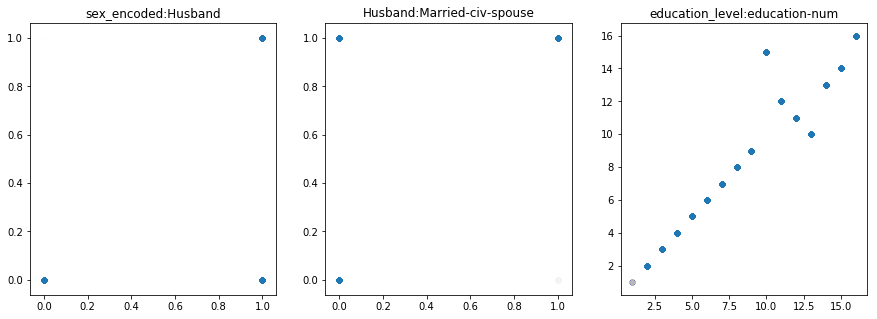

In [16]:
x_len = 1
y_len = 3
f, ax = plt.subplots(x_len, y_len, sharey=False,figsize=(15,5))
index = 0
for x in range(x_len):
    for y in range(y_len):
        a=corr_vars[index][0]
        b=corr_vars[index][1]
        ax[y].scatter(census_data_proc[a], census_data_proc[b], alpha=0.005)
        ax[y].set_title(a + ":" + b)
        index = index + 1
        

plt.show()

## Analisis correlacion

*Las variables que estan correlacionadas tiene todo el sentido 
* **sex_encoded <--> Husband** : Corr=0.581587986083404   --> Los maridos serán hombres 
* **Husband <--> Married-civ-spouse** : Corr=0.8972198554405721  --> Los maridos estan casados 
* **education_level <--> education-num** :  --> Cuantos mas años de estudios, mayor nivel educativo sueles alcanzar 

Si fuera necesario eliminar variables alguna de estas podrían ser candidatas

## Escalado de los datos

A continueción paso a escalar los datos

In [17]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Dividimos los datos en entrenamiento y test (80 training, 20 test)
X_train, X_test, y_train, y_test = train_test_split(census_data_proc.drop(['income_encoded'],axis=1), census_data_proc['income_encoded'], test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

Datos entrenamiento:  (33916, 46)
Datos test:  (11306, 46)


##  Vecinos mas cercanos

Utilizando validación cruzada, entrenamos un modelo de vecinos mas cercanos y obteemos el parametro optimo de numero de vecinos

best mean cross-validation score: 0.835
best parameters: {'n_neighbors': 22}


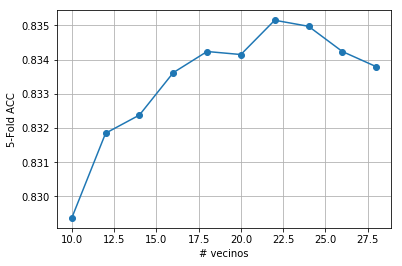

acc (test): 0.83


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

NVecinosIni = 10
NVecinosFin = 30
j = 2
nVecinos = range(NVecinosIni,NVecinosFin,j)

param_grid = {'n_neighbors':  np.arange(NVecinosIni, NVecinosFin, j)}
grid = GridSearchCV(KNeighborsClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_score'])
plt.plot(nVecinos,scores,'-o')
#plt.errorbar(nVecinos, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

print("acc (test): {:.2f}".format(grid.score(XtestScaled, y_test)))

In [19]:
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()
    
    acc = (tp+tn)/(tn+fp+fn+tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))
    
    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1,6], [1,1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

ACC:  0.8287634884132319
SEN:  0.5454868514570007
ESP:  0.9226330664154498
PPV:  0.7002737226277372
FSC:  0.6132640831002797


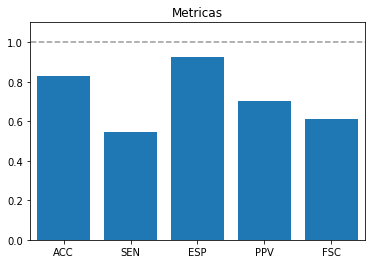

In [22]:
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(XtestScaled)

confmat = confusion_matrix(y_test,y_pred)

calcula_metricas(confmat)



## Regresión logística con regularización

En este caso voy a utilizar el algoritmo de regresión logística y validación cruzada para encontrar el mejor valor del parámetro de regularización C

best mean cross-validation score: 0.734
best parameters: {'C': 1.2742749857031321}


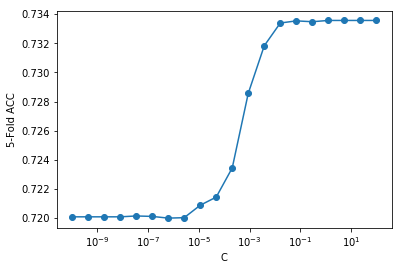

acc (test): 0.73


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

vectorC = np.logspace(-10, 2, 20)
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(fit_intercept=False), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()

print("acc (test): {:.2f}".format(grid.score(XtestScaled, y_test)))

ACC:  0.7316469131434636
SEN:  0.9157782515991472
ESP:  0.6706311822892134
PPV:  0.4795310755489393
FSC:  0.629457743038593


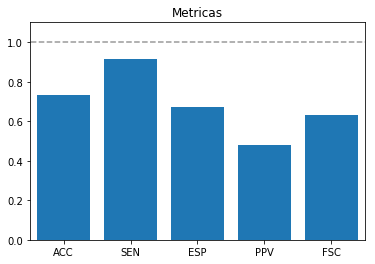

In [24]:
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(XtestScaled)

confmat = confusion_matrix(y_test,y_pred)

calcula_metricas(confmat)

En este caso vamos a comprebar como se adapta si utilizamos un polinomio de grado 2

best mean cross-validation score: 0.844
best parameters: {'C': 0.0008858667904100814}


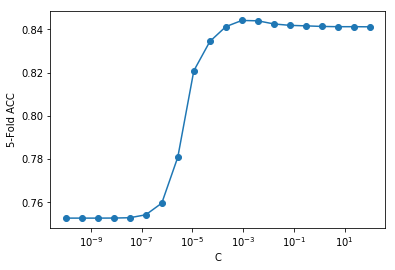

acc (test): 0.84


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

poly     = PolynomialFeatures(2)
XtrainScaledPoly   = poly.fit_transform(XtrainScaled)
XtestScaledPoly   = poly.fit_transform(XtestScaled)


vectorC = np.logspace(-10, 2, 20)
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(fit_intercept=False), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaledPoly, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()

print("acc (test): {:.2f}".format(grid.score(XtestScaledPoly, y_test)))

ACC:  0.8430921634530338
SEN:  0.5934612651030562
ESP:  0.9258125294394725
PPV:  0.7260869565217392
FSC:  0.6531091122409074


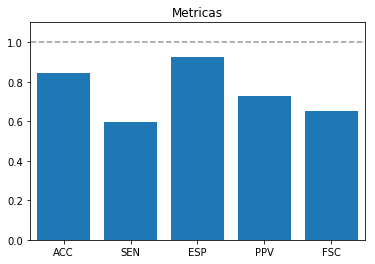

In [26]:
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(XtestScaledPoly)

confmat = confusion_matrix(y_test,y_pred)

calcula_metricas(confmat)

## Aplicamos metodos de filtrado

Aplicamos metodos de filtrado para clasificación para eliminar porsibles variables que no esten aportando nada

In [27]:
from sklearn.feature_selection import f_classif, mutual_info_classif

# do calculations
f_test, _ = f_classif(XtrainScaled, y_train)
f_test /= np.max(f_test)

mi = mutual_info_classif(XtrainScaled, y_train)
mi /= np.max(mi)

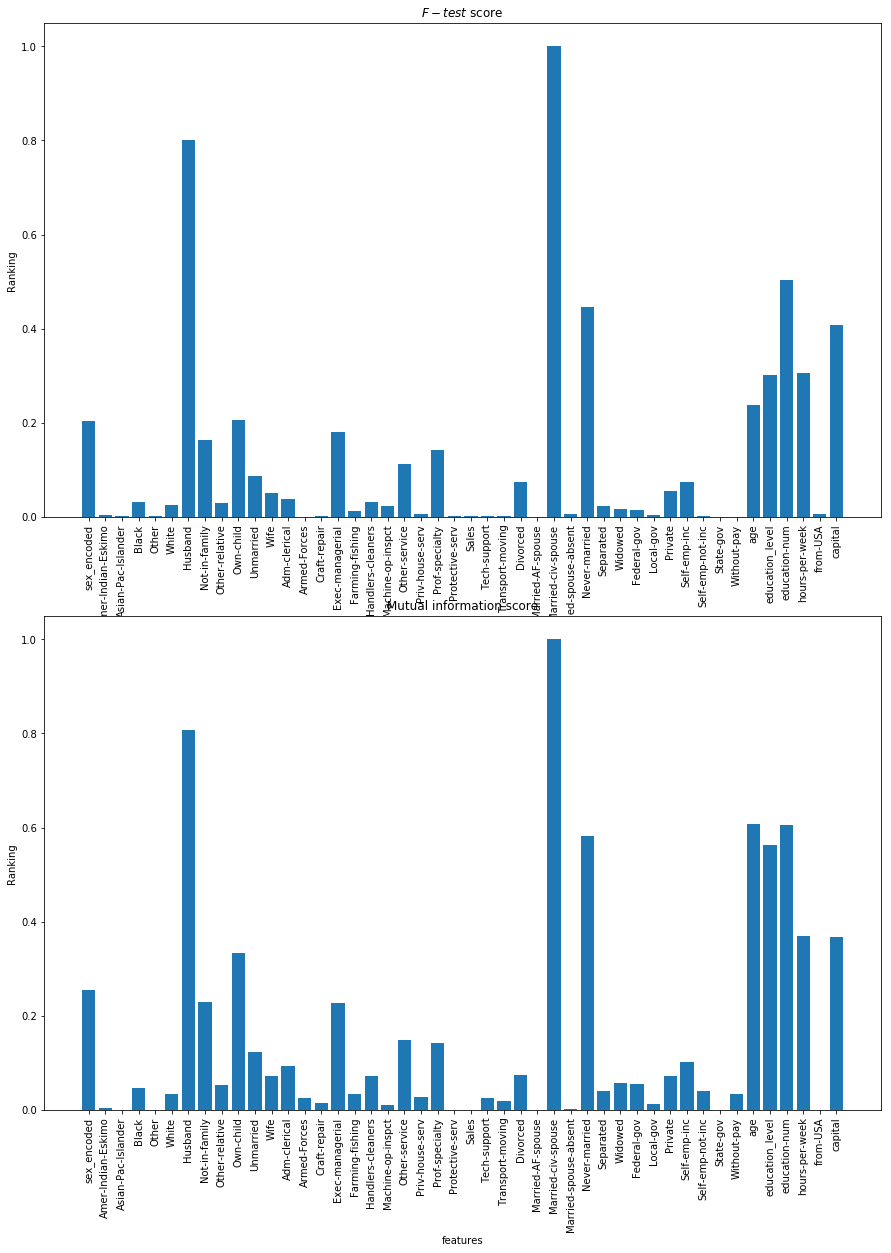

In [28]:
# do some plotting
feature_names = census_data_proc.columns[1:]

plt.figure(figsize=(15, 20))

plt.subplot(2,1,1)
plt.bar(range(XtrainScaled.shape[1]),f_test,  align="center")
plt.xticks(range(XtrainScaled.shape[1]),feature_names,rotation=90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-test$ score')


plt.subplot(2,1,2)
plt.bar(range(XtrainScaled.shape[1]),mi,  align="center")
plt.xticks(range(XtrainScaled.shape[1]),feature_names, rotation=90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

In [29]:
limit = 0.02
dfmi = pd.concat([pd.DataFrame(data=feature_names),pd.DataFrame(data=mi)],axis=1)
dfmi.columns = ['Features','mi']
dfmi = dfmi[dfmi['mi']<limit]
dff_test = pd.concat([pd.DataFrame(data=feature_names),pd.DataFrame(data=f_test)],axis=1)
dff_test.columns = ['Feature2','f_test']
dff_test =dff_test[dff_test['f_test']<limit]

df = pd.concat([dff_test, dfmi], axis=1, join='inner')
df

,Feature2,f_test,Features,mi
1,Amer-Indian-Eskimo,0.003678,Amer-Indian-Eskimo,0.004451
2,Asian-Pac-Islander,0.001084,Asian-Pac-Islander,0.000000
4,Other,0.002709,Other,0.000000
14,Craft-repair,0.001513,Craft-repair,0.014137
22,Protective-serv,0.002039,Protective-serv,0.000000
23,Sales,0.001079,Sales,0.000000
25,Transport-moving,0.001831,Transport-moving,0.018463
27,Married-AF-spouse,0.000145,Married-AF-spouse,0.000000
29,Married-spouse-absent,0.005565,Married-spouse-absent,0.002706
34,Local-gov,0.003319,Local-gov,0.012917


Cogemos un limite y eliminamos las características que tienen menor valor de ese ímite tanto para f_test como para mi y con el nuevo conjunto de características volmenos a entrenar los algoritmos para observar si hay mejoras

In [30]:
X_train_SF = X_train.drop(columns=df['Features'])
X_test_SF = X_test.drop(columns=df['Features'])

print('Datos entrenamiento: ', X_train_SF.shape)
print('Datos test: ', X_test_SF.shape)
print('Objetivos entrenamiento: ', y_train.shape)
print('Objetivos test: ', y_test.shape)

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train_SF)
XtrainScaled_SF = scaler.transform(X_train_SF)
XtestScaled_SF = scaler.transform(X_test_SF)

Datos entrenamiento:  (33916, 34)
Datos test:  (11306, 34)
Objetivos entrenamiento:  (33916,)
Objetivos test:  (11306,)


## Vecinos mas cercanos

best mean cross-validation score: 0.837
best parameters: {'n_neighbors': 22}


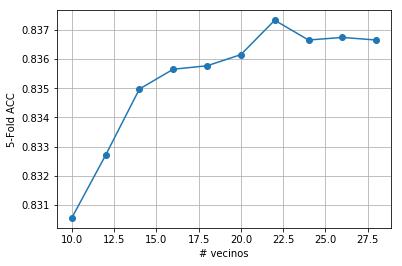

acc (test): 0.83


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

NVecinosIni = 10
NVecinosFin = 30
j = 2
nVecinos = range(NVecinosIni,NVecinosFin,j)

param_grid = {'n_neighbors':  np.arange(NVecinosIni, NVecinosFin, j)}
grid = GridSearchCV(KNeighborsClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled_SF, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_score'])
plt.plot(nVecinos,scores,'-o')
#plt.errorbar(nVecinos, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

print("acc (test): {:.2f}".format(grid.score(XtestScaled_SF, y_test)))

ACC:  0.8330090217583584
SEN:  0.5582800284292821
ESP:  0.9240461610927933
PPV:  0.7089350180505415
FSC:  0.6246520874751491


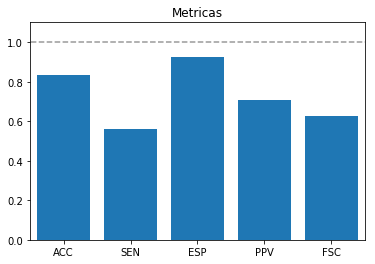

In [32]:
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(XtestScaled_SF)

confmat = confusion_matrix(y_test,y_pred)

calcula_metricas(confmat)

## Regresion logística con regularizacion

best mean cross-validation score: 0.843
best parameters: {'C': 0.003792690190732246}


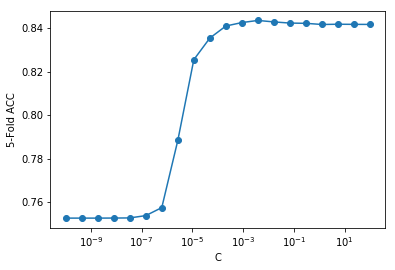

acc (test): 0.84


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

poly     = PolynomialFeatures(2)
XtrainScaledPoly   = poly.fit_transform(XtrainScaled_SF)
XtestScaledPoly   = poly.fit_transform(XtestScaled_SF)


vectorC = np.logspace(-10, 2, 20)
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(fit_intercept=False), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaledPoly, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()

print("acc (test): {:.2f}".format(grid.score(XtestScaledPoly, y_test)))

ACC:  0.840350256500973
SEN:  0.5991471215351812
ESP:  0.9202779086198776
PPV:  0.7134997884045705
FSC:  0.6513424763376473


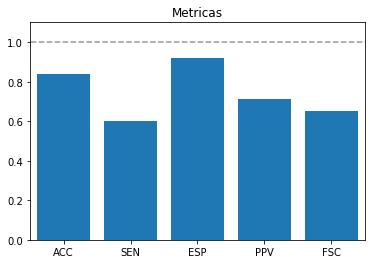

In [34]:
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(XtestScaledPoly)

confmat = confusion_matrix(y_test,y_pred)

calcula_metricas(confmat)

## Arboles de decisión

A continuación pasamos a ver que resultados puede darnos el algoritmos de arnoles de decision.

best mean cross-validation score: 0.837
best parameters: {'max_depth': 8}
acc (test): 0.83


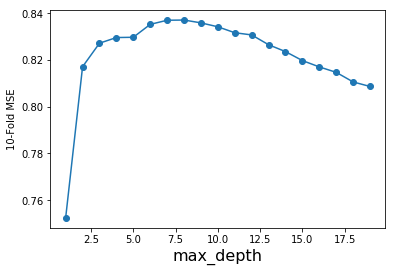

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree




maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled_SF, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("acc (test): {:.2f}".format(grid.score(XtestScaled_SF, y_test)))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

ACC:  0.8291172828586592
SEN:  0.5440653873489695
ESP:  0.9235751295336787
PPV:  0.7022935779816514
FSC:  0.6131357629154986


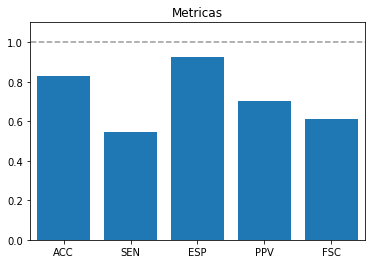

In [36]:
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(XtestScaled_SF)

confmat = confusion_matrix(y_test,y_pred)

calcula_metricas(confmat)

## Random Forest
Probamos con un algoritmo de random forest a ver la mejora

best mean cross-validation score: 0.845
best parameters: {'max_depth': 14}


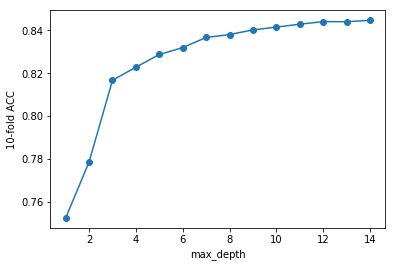

In [37]:
from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(XtrainScaled_SF, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

ACC:  0.8392004245533345
SEN:  0.5639658848614072
ESP:  0.9304050871408385
PPV:  0.7286501377410468
FSC:  0.6358173076923077


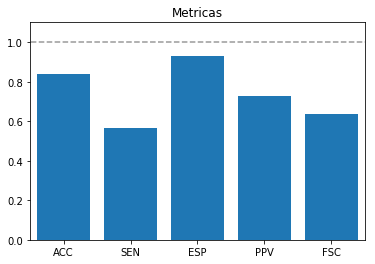

In [38]:
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(XtestScaled_SF)

confmat = confusion_matrix(y_test,y_pred)

calcula_metricas(confmat)

In [39]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(XtrainScaled_SF,y_train)

print("Train: ",bagModel.score(XtrainScaled_SF,y_train))
print("Test: ",bagModel.score(XtestScaled_SF,y_test))

Train:  0.8820910484726973
Test:  0.8390235273306209


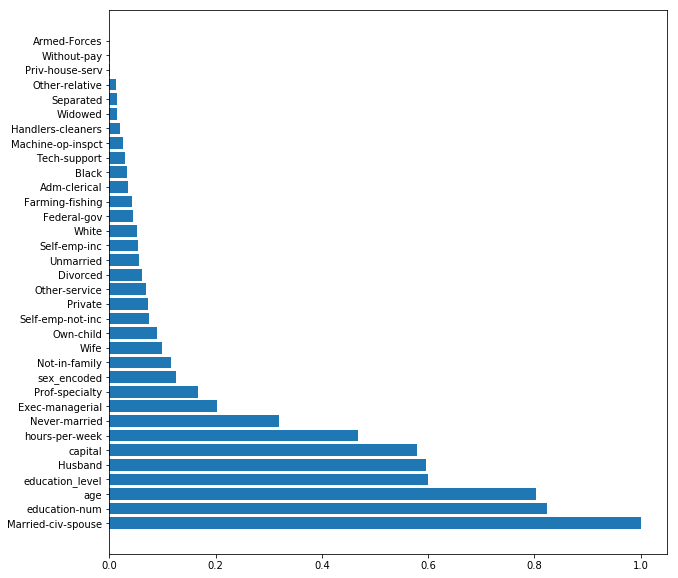

In [40]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(XtrainScaled_SF.shape[1]),importances[indices])
plt.yticks(range(XtrainScaled_SF.shape[1]),X_train_SF.columns[indices])
plt.show()

Muy interesante ver las variables que mas influyen para poder entender el problema Podríamos reducir el numero de carcaterísticas y comprobar como se comporta

## Boosted trees

A continuaión pasamos a intentar mejorar los resultados con boosted trees

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [25,50,75,100,125,150,175,200,300]
learningRate = [0.5,0.1,0.05,0.01]
# mantenemos max_depth estático: max_depth=2

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled_SF, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.847
best parameters: {'learning_rate': 0.1, 'n_estimators': 300}


He probado con max_depth=2 y max_depth=3 que da mejores resultados.

Pasamos a ver los resultados en test con los valores optimos de los parametros obtenidos

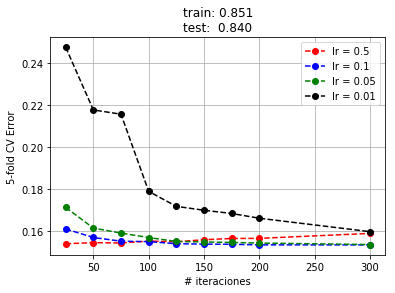

In [42]:
# calculamos métricas globales
bt = GradientBoostingClassifier(random_state=0, max_depth=3,learning_rate= 0.1, n_estimators= 150)
bt.fit(XtrainScaled_SF,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(XtrainScaled_SF,y_train),bt.score(XtestScaled_SF,y_test)))
plt.grid()
plt.show()

ACC:  0.8404387051123298
SEN:  0.5920398009950248
ESP:  0.9227508243052285
PPV:  0.7174849267872524
FSC:  0.6487538940809968


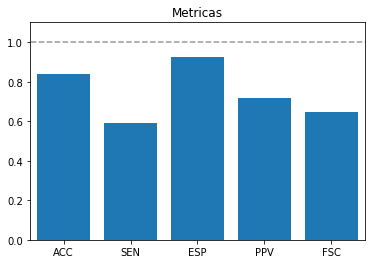

In [43]:
from sklearn.metrics import confusion_matrix

y_pred = bt.predict(XtestScaled_SF)

confmat = confusion_matrix(y_test,y_pred)

calcula_metricas(confmat)

Analizamos la importancia de las variables para conocer mejor el problema

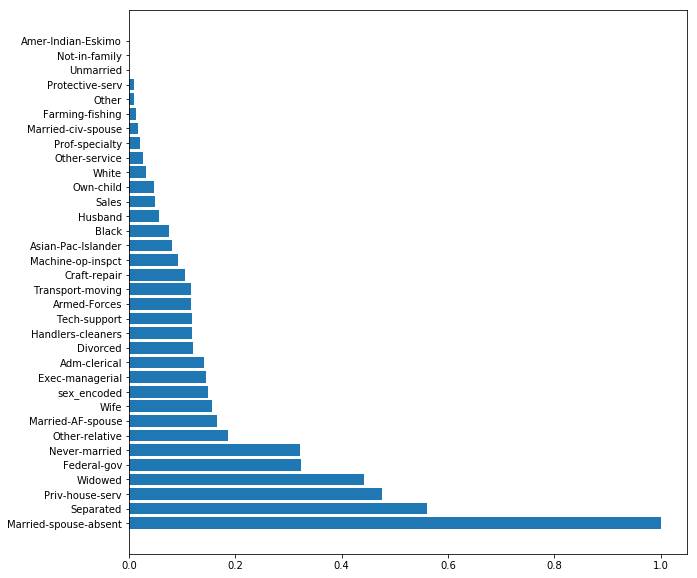

In [44]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(XtrainScaled_SF.shape[1]),importances[indices])
plt.yticks(range(XtrainScaled_SF.shape[1]),feature_names[indices])
plt.show()

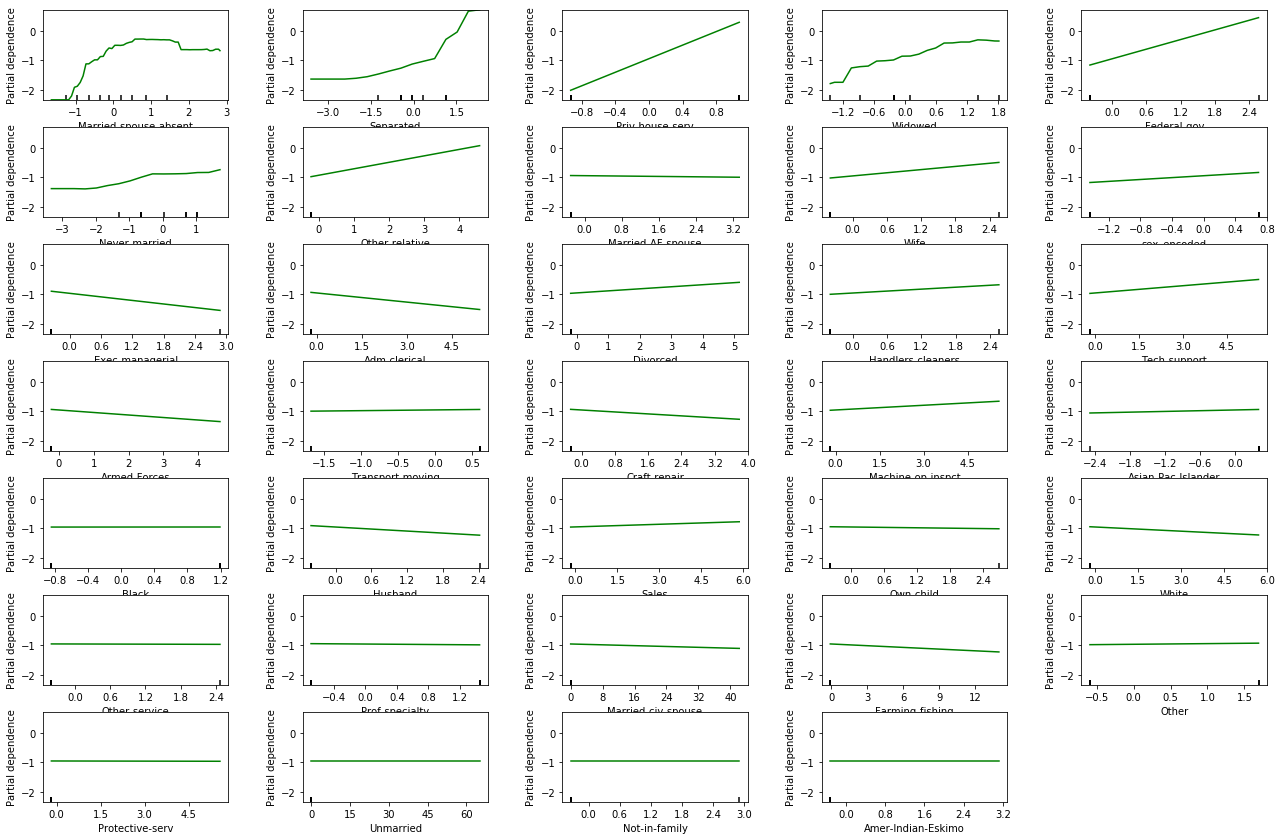

In [45]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

fig, ax = plot_partial_dependence(bt, XtrainScaled_SF, indices, feature_names=feature_names,
                                 percentiles=(0.0, 1.0), n_cols = 5)
fig.set_size_inches(20, 20)
plt.show()

## SVMs y metodos kernel

Comenzamos probando con un kernel lineal

Ya estamos trabajando con los datos escalados, que es muy importante para estos métodos


In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

vectorC = np.logspace(-3, 3, 21)

param_grid = {'C': vectorC}

grid = GridSearchCV(SVC(kernel='linear'),scoring='accuracy', param_grid=param_grid, cv=5).fit(XtrainScaled_SF,y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.840
best parameters: {'C': 0.001995262314968879}


In [47]:
Copt = grid.best_params_['C']

svmModel3 = SVC(kernel='linear',C = Copt, probability=True).fit(XtrainScaled_SF,y_train)

print('Acc (TEST): %0.2f'%svmModel3.score(XtestScaled_SF,y_test))

Acc (TEST): 0.84


Probamos con un kernel RBF

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

vectorC = np.logspace(-3, 3, 21)
vectorG = np.logspace(-5, 1, 21)

param_grid = {'C': vectorC,
              'gamma':vectorG}

grid = GridSearchCV(SVC(kernel='rbf'),scoring='accuracy', param_grid=param_grid, cv=5).fit(XtrainScaled_SF,y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))


In [ ]:
# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [ ]:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel3 = SVC(kernel='rbf',gamma = Gopt, C = Copt, probability=True).fit(XtrainScaled_SF,y_train)

print('Acc (TEST): %0.2f'%svmModel3.score(XtestScaled_SF,y_test))

## Conclusiones

En este problema me he centrado principalmente en la utilización de muchos algoritmos diferentes, pero sin centrarme en optimizar ninguno en concreto. Los siguientes pasos serían seleccionar uno e intentar optimizarlo.

La moyoria de los algoritmos en este caso tienen un rendimiento similar. Cabe destacar lo mucho ue tarda SVM, no he tenido tiempo para que termine la ejecución con un kernel RBF